### Problem Statement: 


Predicting the resale value of a car is not a simple task. It is trite knowledge that the value of used cars depends on a number of factors. The most important ones are usually the age of the car, its make (and model), the origin of the car (the original country of the manufacturer), its mileage (the number of kilometers it has run) and it's fuel type.

This study focuses on predicting a used car's selling price all over India using various supervised machine learning models based on car features.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows",None)

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

In [2]:
#Loading Our Dataset
df = pd.read_csv("cars.csv")
df.head()

Unnamed: 0             Name    Brand      Price Kilometers Transmission  \
0           0    ['OMNI', 'E']   Maruti  ₹1,90,199      23 km          STR   
1           1  ['Alto', '800']   Maruti  ₹2,93,599  12,535 km       Manual   
2           2        ['VENUE']  Hyundai  ₹7,94,699   2,589 km        KAPPA   
3           3  ['Alto', 'K10']   Maruti  ₹2,21,299  40,184 km       Manual   
4           4  ['Alto', '800']   Maruti  ₹2,61,199   9,217 km       Manual   

     Fuel Monthly_EMI Downpayment  Ownership              Engine  \
0  Petrol      ₹4,231        Zero  1st Owner               ['8']   
1  Petrol      ₹6,531        Zero  1st Owner             ['VXI']   
2  Petrol     ₹17,678        Zero  1st Owner  ['S', 'MT', '1.2']   
3  Petrol      ₹4,923        Zero  1st Owner             ['LXI']   
4  Petrol      ₹5,810        Zero  1st Owner             ['LXI']   

   Year_of_Purchase                                                URL  
0              2014  https://www.cars24.com/buy-used-Maruti-OMNI-E-...  
1              2014  https://www.cars24.com/buy-used-Maruti-Alto-80...  
2              2021  https://www.cars24.com/buy-used-Hyundai-VENUE-...  
3              2013  https://www.cars24.com/buy-used-Maruti-Alto-K1...  
4              2015  https://www.cars24.com/buy-used-Maruti-Alto-80...

### Exploratory Data Analysis (EDA)

In [3]:
#Analysing Datatypes in our dataset and Checking for null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9100 non-null   int64 
 1   Name              9100 non-null   object
 2   Brand             9100 non-null   object
 3   Price             9100 non-null   object
 4   Kilometers        9100 non-null   object
 5   Transmission      9100 non-null   object
 6   Fuel              9100 non-null   object
 7   Monthly_EMI       9100 non-null   object
 8   Downpayment       9100 non-null   object
 9   Ownership         9100 non-null   object
 10  Engine            9100 non-null   object
 11  Year_of_Purchase  9100 non-null   int64 
 12  URL               9100 non-null   object
dtypes: int64(2), object(11)
memory usage: 924.3+ KB


In [4]:
#Determining Shape of our dataset
print("Shape of our dataset is : ",df.shape)

Shape of our dataset is :  (9100, 13)


In [5]:
#Checking for Null Values

df.isna().sum()

Unnamed: 0          0
Name                0
Brand               0
Price               0
Kilometers          0
Transmission        0
Fuel                0
Monthly_EMI         0
Downpayment         0
Ownership           0
Engine              0
Year_of_Purchase    0
URL                 0
dtype: int64

In [6]:
#Checking for Duplicate Values

df.duplicated().sum()

0

In [7]:
#Statistical Analysis of Numerical Features in our dataset
df.describe()

Unnamed: 0  Year_of_Purchase
count  9100.000000       9100.000000
mean   4549.500000       2015.016044
std    2627.088058          2.874020
min       0.000000       2007.000000
25%    2274.750000       2013.000000
50%    4549.500000       2015.000000
75%    6824.250000       2017.000000
max    9099.000000       2021.000000

### Data Cleaning

In [8]:
#Dropping Unnecessary column
df.drop('Unnamed: 0', axis = 1, inplace = True)

__Extracting selling car's City from it's given URL__

In [9]:
city = df['URL']

In [10]:
city

0       https://www.cars24.com/buy-used-Maruti-OMNI-E-...
1       https://www.cars24.com/buy-used-Maruti-Alto-80...
2       https://www.cars24.com/buy-used-Hyundai-VENUE-...
3       https://www.cars24.com/buy-used-Maruti-Alto-K1...
4       https://www.cars24.com/buy-used-Maruti-Alto-80...
5       https://www.cars24.com/buy-used-Maruti-Swift-2...
6       https://www.cars24.com/buy-used-Honda-Brio-201...
7       https://www.cars24.com/buy-used-Hyundai-Grand-...
8       https://www.cars24.com/buy-used-Maruti-Alto-K1...
9       https://www.cars24.com/buy-used-Maruti-Alto-K1...
10      https://www.cars24.com/buy-used-Hyundai-Eon-20...
11      https://www.cars24.com/buy-used-Maruti-Zen-Est...
12      https://www.cars24.com/buy-used-Volkswagen-Pol...
13      https://www.cars24.com/buy-used-Tata-Nano-2016...
14      https://www.cars24.com/buy-used-Maruti-Alto-20...
15      https://www.cars24.com/buy-used-Maruti-Alto-20...
16      https://www.cars24.com/buy-used-Hyundai-Grand-...
17      https:

In [11]:
newlist = [x.split('-') for x in city]
newlist

[['https://www.cars24.com/buy',
  'used',
  'Maruti',
  'OMNI',
  'E',
  '2014',
  'cars',
  'New',
  'Delhi',
  '1007150522/'],
 ['https://www.cars24.com/buy',
  'used',
  'Maruti',
  'Alto',
  '800',
  '2014',
  'cars',
  'New',
  'Delhi',
  '1057739946/'],
 ['https://www.cars24.com/buy',
  'used',
  'Hyundai',
  'VENUE',
  '2021',
  'cars',
  'New',
  'Delhi',
  '1124913747/'],
 ['https://www.cars24.com/buy',
  'used',
  'Maruti',
  'Alto',
  'K10',
  '2013',
  'cars',
  'New',
  'Delhi',
  '1000462828/'],
 ['https://www.cars24.com/buy',
  'used',
  'Maruti',
  'Alto',
  '800',
  '2015',
  'cars',
  'Noida',
  '1003246126/'],
 ['https://www.cars24.com/buy',
  'used',
  'Maruti',
  'Swift',
  '2012',
  'cars',
  'Noida',
  '1006542537/'],
 ['https://www.cars24.com/buy',
  'used',
  'Honda',
  'Brio',
  '2012',
  'cars',
  'Gurgaon',
  '1126597007/'],
 ['https://www.cars24.com/buy',
  'used',
  'Hyundai',
  'Grand',
  'i10',
  '2014',
  'cars',
  'Faridabad',
  '1052736921/'],
 ['http

In [12]:
State = []
State = [i[-2] for i in newlist]
State

['Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Noida',
 'Gurgaon',
 'Faridabad',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Noida',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Gurgaon',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Gurgaon',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Gurgaon',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Gurgaon',
 'Delhi',
 'Delhi',
 'Delhi',
 'Faridabad',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Delhi',
 'Delhi',
 'Gurgaon',
 'Gurgaon',
 'Noida',
 'Delhi',
 'Noida',
 'Delhi',
 'Gurgaon',
 'Delhi',
 'Noida',
 'Delhi',
 'Noida',
 'Delhi',
 'Faridabad',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Gurgaon',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Delhi',
 'Noida',
 'Delhi',
 'Gurgaon',
 'Noida',
 'Delhi',
 'Delhi',
 'Delhi',
 'Noida'

In [13]:
df['State'] = State

__Removing all unnecessary Delimeters from our Name column__

In [14]:
df['Name'] = df.Name.str.replace("[,'']", "")
df['new_name'] = [i[1:-1] for i in df['Name']]
df['new_name']

0                   OMNI E
1                 Alto 800
2                    VENUE
3                 Alto K10
4                 Alto 800
5                    Swift
6                     Brio
7                Grand i10
8                 Alto K10
9                 Alto K10
10                     Eon
11              Zen Estilo
12                    Polo
13                    Nano
14                    Alto
15                    Alto
16               Grand i10
17                Alto K10
18                  Baleno
19                Alto K10
20                Alto 800
21                  A Star
22                Alto 800
23                Alto K10
24                Alto 800
25                    Kwid
26                   Swift
27                    Alto
28                Alto K10
29             Wagon R 1.0
30                    Alto
31                Alto 800
32                Alto K10
33                Alto 800
34                    Kwid
35                     Eon
36                Alto 800
3

__Removing all unnecessary Delimeters from our Price column__

In [15]:
df['Price'] = df.Price.str.replace("₹", "")
df['Price'] = df.Price.str.replace(",", "")
df['new_price'] = [i[:] for i in df['Price']]
df['new_price']

0        190199
1        293599
2        794699
3        221299
4        261199
5        294399
6        278799
7        376999
8        352599
9        221999
10       305599
11       177399
12       369499
13       199599
14       398899
15       357099
16       454899
17       229799
18       574999
19       348599
20       308199
21       195999
22       286399
23       279299
24       324099
25       289299
26       511799
27       174699
28       237999
29       418599
30       359499
31       322699
32       351899
33       206699
34       383799
35       267000
36       255299
37       532299
38       321399
39       179199
40       160399
41       354999
42       460299
43       412199
44       273999
45       268699
46       370199
47       208399
48       334799
49       326899
50       399999
51       331299
52       300499
53       370999
54       501499
55       203799
56       234799
57       334499
58       485599
59       314199
60       275999
61       292499
62      

__Removing all unnecessary Delimeters from our Kilometers column__

In [16]:
df['Kilometers'] = df.Kilometers.str.replace("[,'']", "")
df['new_kms'] = [i[:] for i in df['Kilometers']]
df['new_kms']

0           23 km
1        12535 km
2         2589 km
3        40184 km
4         9217 km
5        31999 km
6        19415 km
7        22836 km
8        11691 km
9        24353 km
10       12749 km
11       39300 km
12       34364 km
13       20039 km
14        3403 km
15        7610 km
16       13899 km
17       33175 km
18        5645 km
19       12139 km
20       10608 km
21       57489 km
22       17637 km
23       10957 km
24        7093 km
25       20231 km
26       17054 km
27       29645 km
28       17374 km
29       12808 km
30        2723 km
31        2147 km
32       28704 km
33       25610 km
34       11721 km
35       20494 km
36       15581 km
37       30737 km
38       49654 km
39       40666 km
40       56231 km
41       11026 km
42       16646 km
43        4093 km
44       13054 km
45        5636 km
46       33554 km
47       28685 km
48       20764 km
49       32281 km
50       36220 km
51       17178 km
52       40551 km
53       20685 km
54        7524 km
55       5

In [17]:
df['new_kms'] = df['new_kms'].str.split(' ').str[0]
df['new_kms']

0           23
1        12535
2         2589
3        40184
4         9217
5        31999
6        19415
7        22836
8        11691
9        24353
10       12749
11       39300
12       34364
13       20039
14        3403
15        7610
16       13899
17       33175
18        5645
19       12139
20       10608
21       57489
22       17637
23       10957
24        7093
25       20231
26       17054
27       29645
28       17374
29       12808
30        2723
31        2147
32       28704
33       25610
34       11721
35       20494
36       15581
37       30737
38       49654
39       40666
40       56231
41       11026
42       16646
43        4093
44       13054
45        5636
46       33554
47       28685
48       20764
49       32281
50       36220
51       17178
52       40551
53       20685
54        7524
55       51523
56       24699
57       11961
58       12268
59        8490
60       36628
61       25360
62        3865
63       33141
64        4313
65       29449
66       4

__Removing all unnecessary Delimeters from our Monthly_EMI column__

In [18]:
df['Monthly_EMI'] = df.Monthly_EMI.str.replace("₹","")
df['Monthly_EMI'] = df.Monthly_EMI.str.replace(",","")
df['new_monthly_EMI'] = [i[:] for i in df['Monthly_EMI']]
df['new_monthly_EMI']

0        4231
1        6531
2       17678
3        4923
4        5810
5        6549
6        6202
7        8386
8        7843
9        4938
10       6798
11       3946
12       8219
13       4440
14       8873
15       7943
16      10119
17       5112
18      12791
19       7754
20       6856
21       4360
22       6371
23       6213
24       7209
25       6435
26      11385
27       3886
28       5294
29       9312
30       7997
31       7178
32       7828
33       4598
34       8537
35       5939
36       5679
37      11841
38       7149
39       3986
40       3568
41       7897
42      10239
43       9169
44       6095
45       5977
46       8235
47       4636
48       7447
49       7272
50       8898
51       7370
52       6684
53       8253
54      11156
55       4533
56       5223
57       7441
58      10802
59       6989
60       6139
61       6506
62      11487
63       8965
64       7523
65       7714
66       4017
67       7619
68       3159
69       8375
70       6731
71    

__Extracting first character in Ownership column to signify number of owners__

In [19]:
df['new_ownership'] = df['Ownership'].str[0]

__Removing all unnecessary Delimeters from our Engine column__

In [20]:
df['Engine'] = df.Engine.str.replace("[,'']", "")
df['new_engine'] = [i[1:-1] for i in df['Engine']]
df['new_engine']

0                                          8
1                                        VXI
2                                   S MT 1.2
3                                        LXI
4                                        LXI
5                                        LXI
6                            1.2 S MT I VTEC
7                            SPORTS 1.2 VTVT
8                                        VXI
9                                        VXI
10                                MAGNA PLUS
11                                       LXI
12                       HIGHLINE1.2L PETROL
13                                 TWIST XTA
14                                       LXI
15                                       LXI
16                      MAGNA 1.2 KAPPA VTVT
17                                       LXI
18                             SIGMA 1.2 K12
19                                       VXI
20                                       LXI
21                                       VXI
22        

__Finally changing Datatypes of our quantitative columns__

In [21]:
df['new_price'] = df['new_price'].astype(int)
df['new_kms'] = df['new_kms'].astype(int)
df['new_monthly_EMI'] = df['new_monthly_EMI'].astype(int)

__Dropping columns which were used to extract new columns__

In [22]:
df.drop(columns =['Name','Price','Kilometers','Monthly_EMI','Ownership','Engine'], inplace = True)

__Splitting Transmission in two categories i.e. Automatic and Manual by subgrouping__

In [23]:
df['Transmission'].value_counts()

Manual         7781
Automatic       980
AT               52
CRDI             31
AMT              30
PETROL           28
VTVT             17
MT               14
G                12
ABS              10
CVT               9
STR               8
FWD               7
SHVS              7
1.2               6
STD               6
Kryotec           5
DIESEL            5
TONE              5
HYBIRD            4
SUNROOF           4
PLUS              4
Revotron          3
TDCI              3
EDITION           3
Petrol            3
VXI               3
1.1               3
VTEC              3
EXI               2
OPT               2
AGS               2
VDI               2
(SUNROOF)         2
J                 2
4*2               2
RXZ               2
at                2
L                 2
HYBRID            2
1.0               2
IV                1
edition           1
I-VTECH           1
III               1
2WD               1
PREMIUM           1
(o)               1
KAPPA             1
SLE               1


In [24]:
df.apply(pd.Series.replace, to_replace='AMT', value= 'Automatic', inplace = True)
df.apply(pd.Series.replace, to_replace='AT', value= 'Automatic', inplace = True )
df.apply(pd.Series.replace, to_replace='KAPPA', value= 'Automatic', inplace = True)
df.apply(pd.Series.replace, to_replace='VTVT', value= 'Automatic',  inplace = True)
df.apply(pd.Series.replace, to_replace='at', value= 'Automatic',  inplace = True)

Brand               None
Transmission        None
Fuel                None
Downpayment         None
Year_of_Purchase    None
URL                 None
State               None
new_name            None
new_price           None
new_kms             None
new_monthly_EMI     None
new_ownership       None
new_engine          None
dtype: object

In [25]:
df['Transmission'][df['Transmission'] != 'Automatic'] = 'Manual'

In [26]:
df['Transmission'].value_counts()

Manual       8018
Automatic    1082
Name: Transmission, dtype: int64

__Extracting Age of Car by Year of Purchase__

In [27]:
df['Car_Age'] = 2021 - df['Year_of_Purchase']

In [28]:
df.head()

Brand Transmission    Fuel Downpayment  Year_of_Purchase  \
0   Maruti       Manual  Petrol        Zero              2014   
1   Maruti       Manual  Petrol        Zero              2014   
2  Hyundai    Automatic  Petrol        Zero              2021   
3   Maruti       Manual  Petrol        Zero              2013   
4   Maruti       Manual  Petrol        Zero              2015   

                                                 URL  State  new_name  \
0  https://www.cars24.com/buy-used-Maruti-OMNI-E-...  Delhi    OMNI E   
1  https://www.cars24.com/buy-used-Maruti-Alto-80...  Delhi  Alto 800   
2  https://www.cars24.com/buy-used-Hyundai-VENUE-...  Delhi     VENUE   
3  https://www.cars24.com/buy-used-Maruti-Alto-K1...  Delhi  Alto K10   
4  https://www.cars24.com/buy-used-Maruti-Alto-80...  Noida  Alto 800   

   new_price  new_kms  new_monthly_EMI new_ownership new_engine  Car_Age  
0     190199       23             4231             1          8        7  
1     293599    12535             6531             1        VXI        7  
2     794699     2589            17678             1   S MT 1.2        0  
3     221299    40184             4923             1        LXI        8  
4     261199     9217             5810             1        LXI        6

### Univariate Analysis

Text(0.5, 1.0, 'Cars of Different Brands')

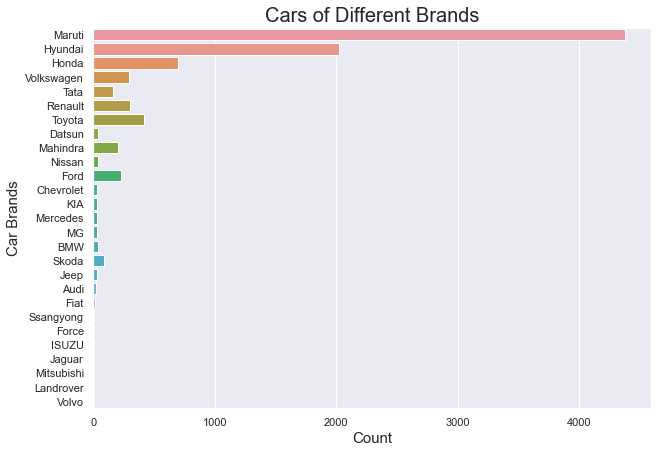

In [29]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, y = 'Brand')
plt.ylabel("Car Brands",fontsize = 15)
plt.xlabel("Count",fontsize = 15)
plt.title("Cars of Different Brands", fontsize = 20)

Text(0.5, 1.0, 'Different Car Models')

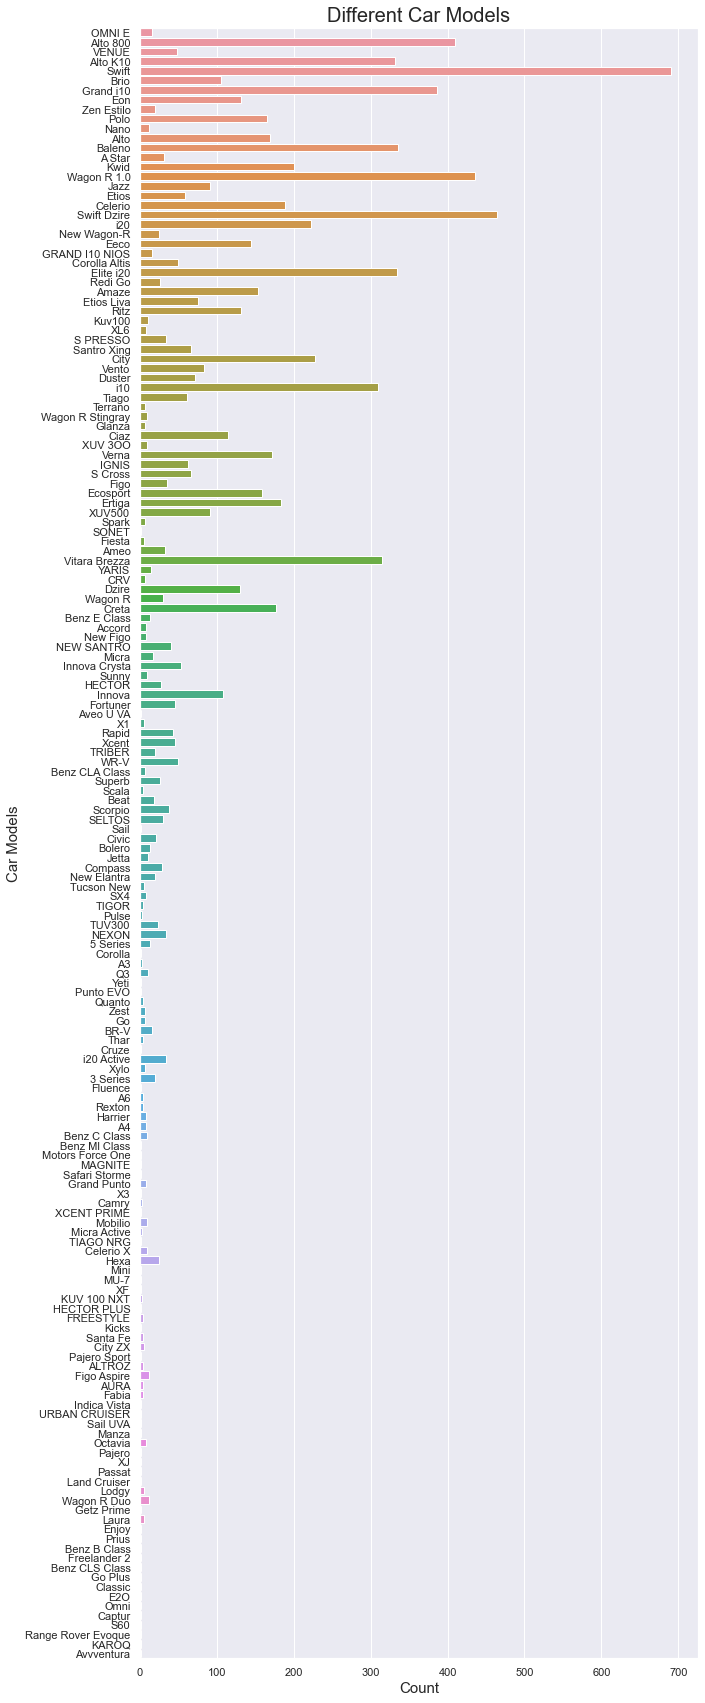

In [30]:
plt.figure(figsize = (10,30))
sns.countplot(data = df, y = 'new_name')
plt.ylabel("Car Models",fontsize = 15)
plt.xlabel("Count",fontsize = 15)
plt.title("Different Car Models", fontsize = 20)

Text(0.5, 1.0, 'Different Car Transmission System')

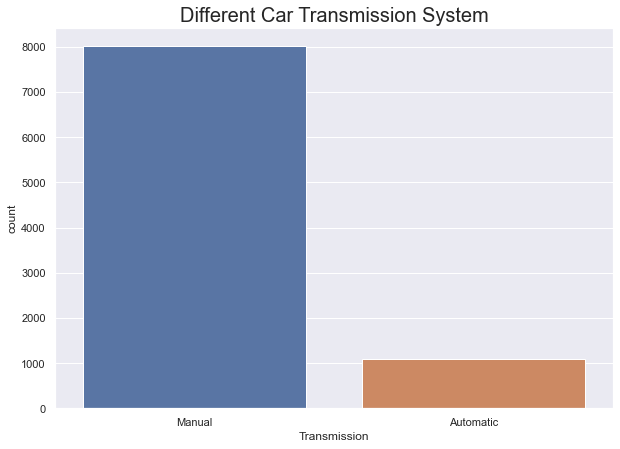

In [31]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'Transmission')
"""plt.ylabel("Car Models",fontsize = 15)
plt.xlabel("Count",fontsize = 15)"""
plt.title("Different Car Transmission System", fontsize = 20)

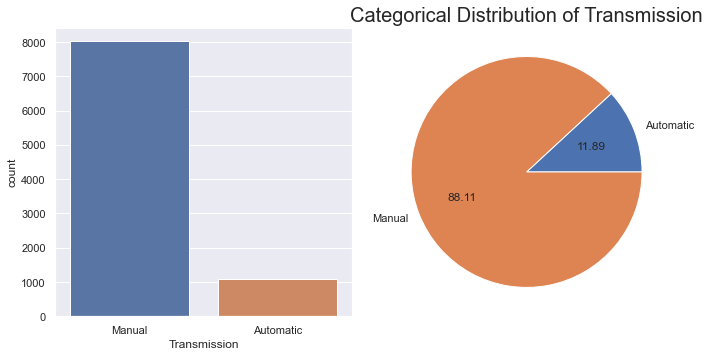

In [32]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Transmission'], ax = ax[0])
df.groupby('Transmission').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Transmission", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

Text(0.5, 1.0, 'Cars from different states')

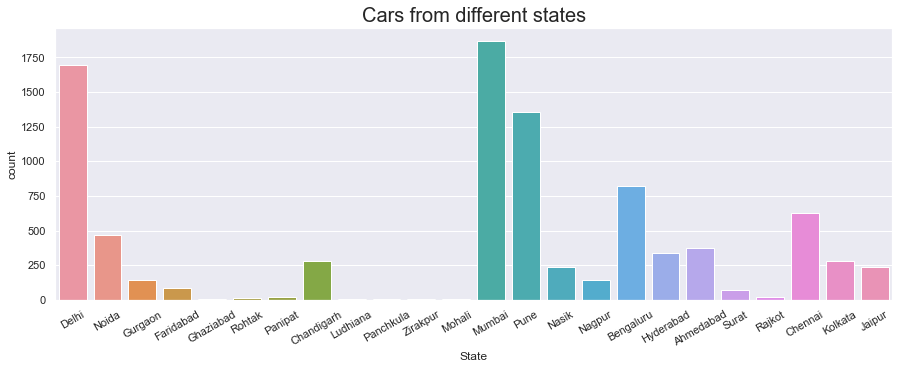

In [33]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'State')
plt.xticks(rotation = 30)
"""plt.ylabel("Car Models",fontsize = 15)
plt.xlabel("Count",fontsize = 15)"""
plt.title("Cars from different states", fontsize = 20)

Text(0.5, 1.0, 'Different Car Fuel Type')

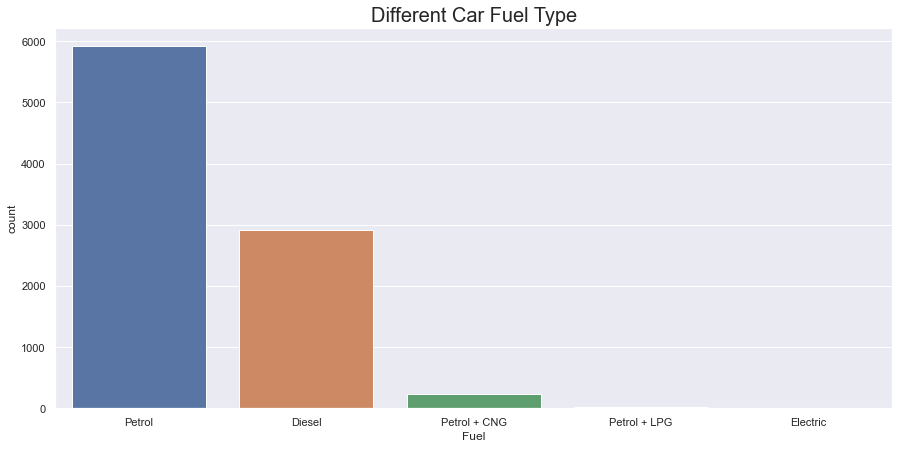

In [34]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'Fuel')
"""plt.ylabel("Car Models",fontsize = 15)
plt.xlabel("Count",fontsize = 15)"""
plt.title("Different Car Fuel Type", fontsize = 20)

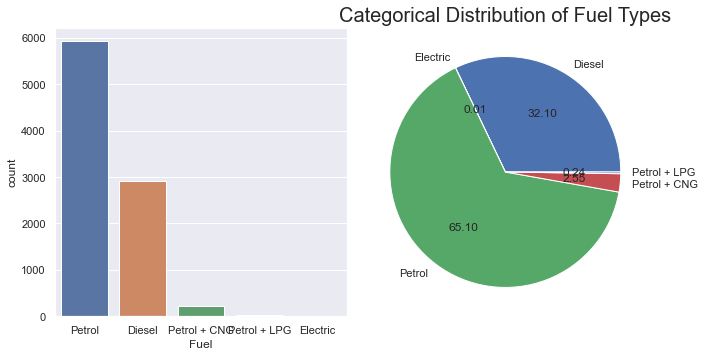

In [35]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Fuel'], ax = ax[0])
df.groupby('Fuel').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Fuel Types", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

Text(0.5, 1.0, 'Different Car Engines')

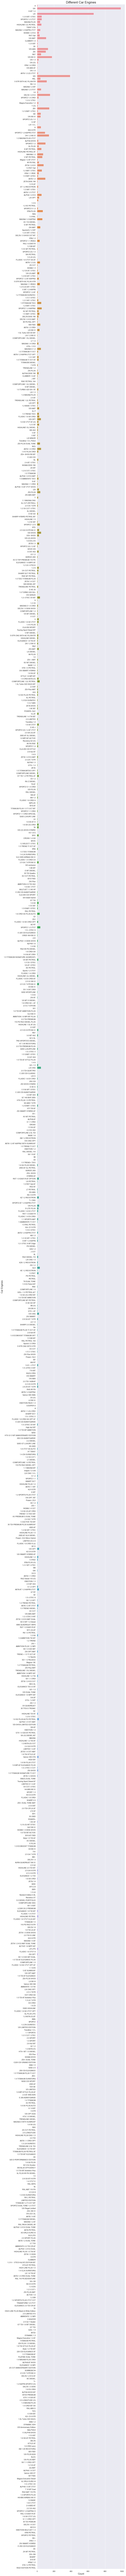

In [36]:
plt.figure(figsize = (10,300))
sns.countplot(data = df, y = 'new_engine'[:200])
plt.ylabel("Car Engines",fontsize = 15)
plt.xlabel("Count",fontsize = 15)
plt.title("Different Car Engines", fontsize = 20)

Text(0.5, 1.0, 'Year Of Purchase')

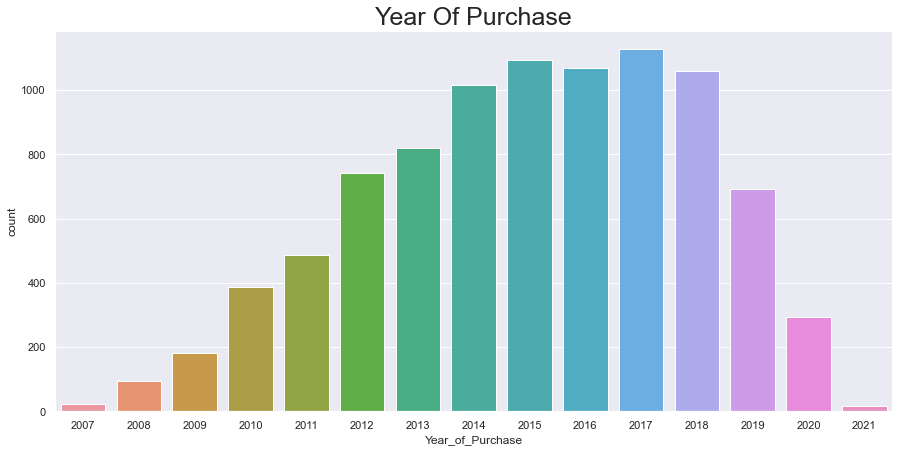

In [37]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'Year_of_Purchase')
plt.title('Year Of Purchase', fontsize = 25 )

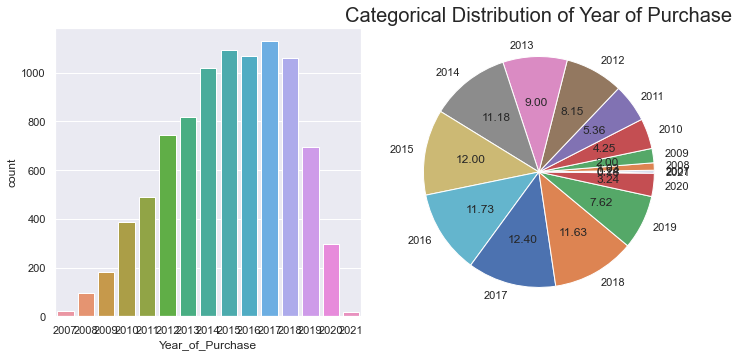

In [38]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Year_of_Purchase'], ax = ax[0])
df.groupby('Year_of_Purchase').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Year of Purchase", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

<AxesSubplot:xlabel='Downpayment', ylabel='count'>

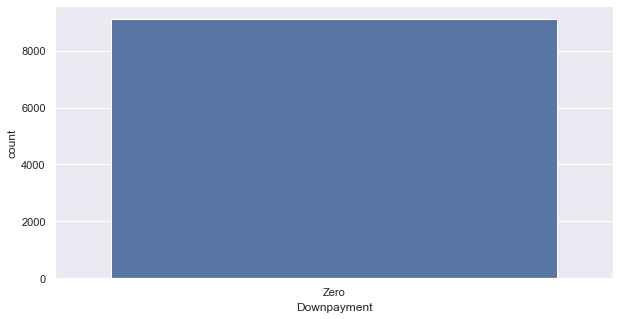

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Downpayment')

Text(0.5, 1.0, 'Ownership')

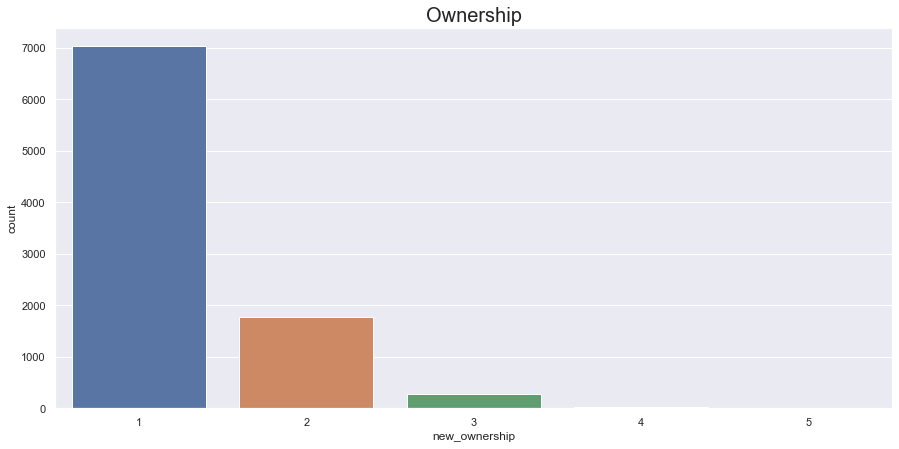

In [40]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'new_ownership')
plt.title("Ownership", fontsize = 20)

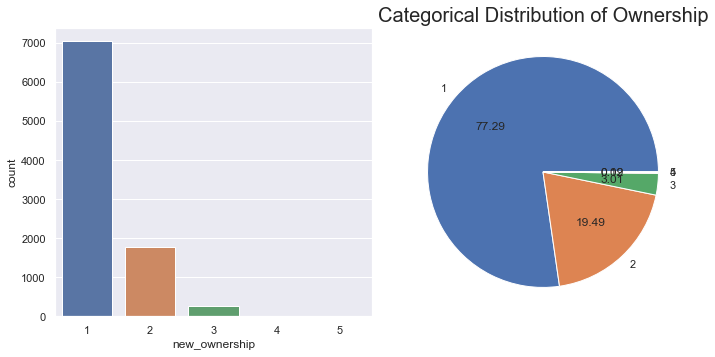

In [41]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['new_ownership'], ax = ax[0])
df.groupby('new_ownership').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Ownership", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

Text(0.5, 1.0, 'Age of Car as of 2021')

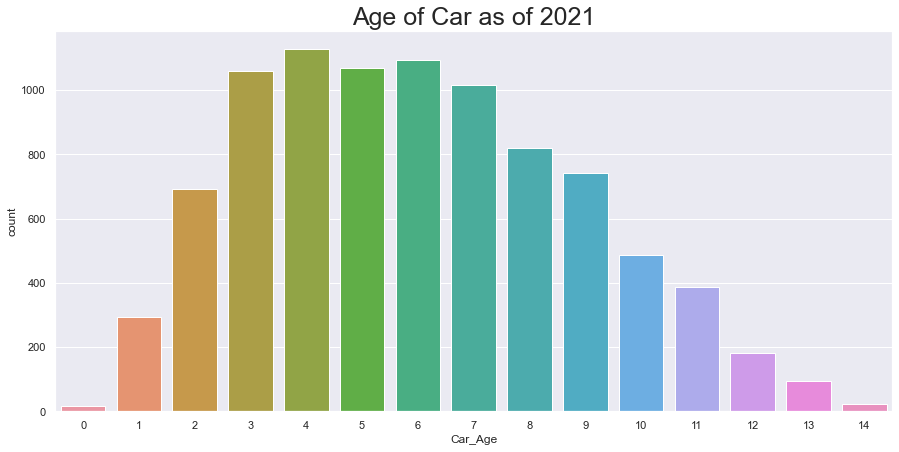

In [42]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'Car_Age')
plt.title('Age of Car as of 2021', fontsize = 25 )

Text(0.5, 1.0, 'Distribution of Kilometers Driven')

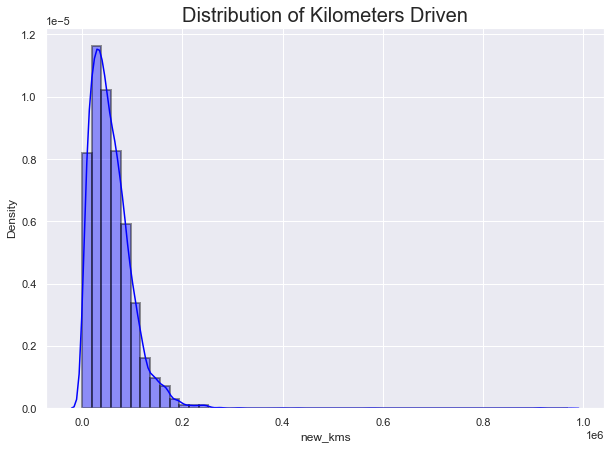

In [43]:
plt.figure(figsize = (10,7))
sns.distplot(df['new_kms'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Kilometers Driven", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Monthly EMI')

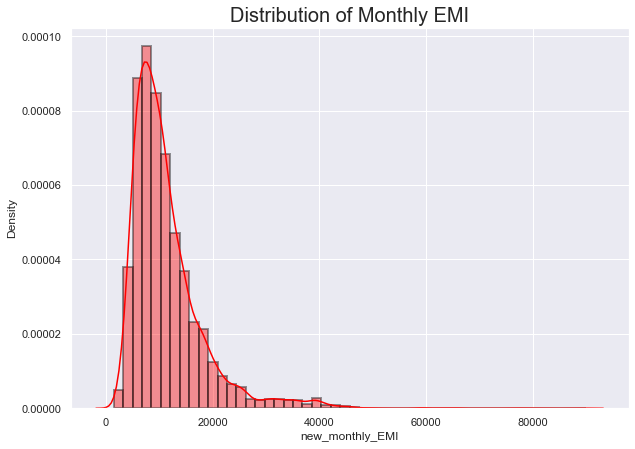

In [44]:
plt.figure(figsize = (10,7))
sns.distplot(df['new_monthly_EMI'], color = 'red',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Monthly EMI", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Price')

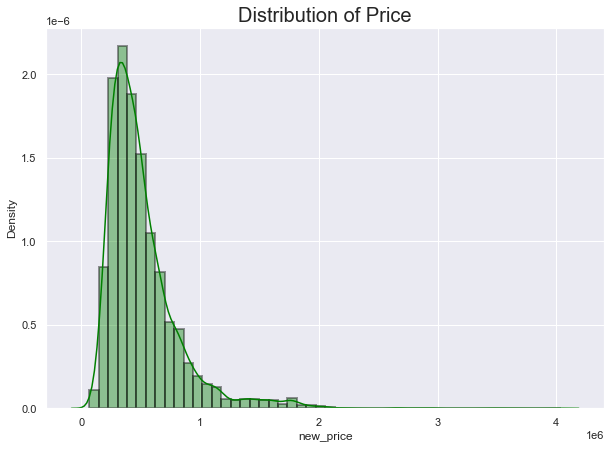

In [45]:
plt.figure(figsize = (10,7))
sns.distplot(df['new_price'], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Price", fontsize = 20)

- Car from Maruti are high in number.

- Frequency of Cars with Manual transmission are 8x then Automatic cars in our dataset.

- Most of the cars are sold from Mumbai followed by Delhi.

- Most cars sold are from the first owners.

- Our Data is right – skewed for features kilometers driven, Price, and Monthly EMI.

- Petrol Cars advertised are High number. 

### Bivariate Analysis

Text(0.5, 1.0, 'Effect on Selling Price by Fuel Type')

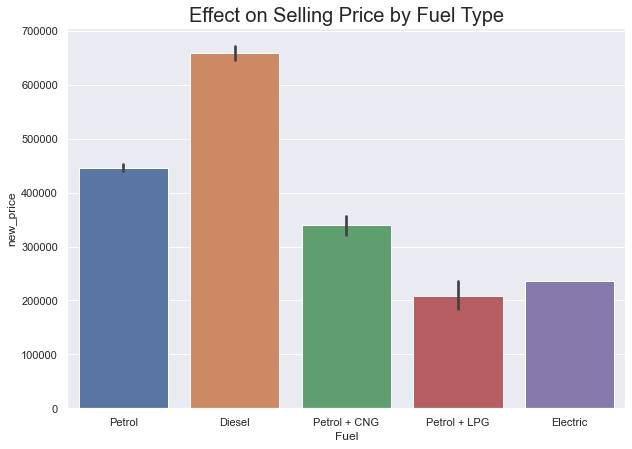

In [46]:
plt.figure(figsize = (10,7))
sns.barplot(data = df, x = 'Fuel', y = 'new_price')
plt.title("Effect on Selling Price by Fuel Type", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Brand')

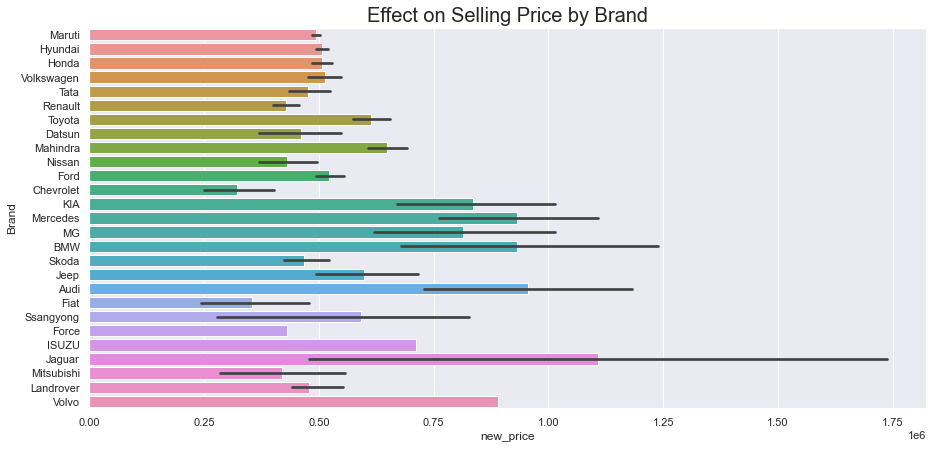

In [47]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='new_price', y = 'Brand')
plt.title("Effect on Selling Price by Brand", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Model')

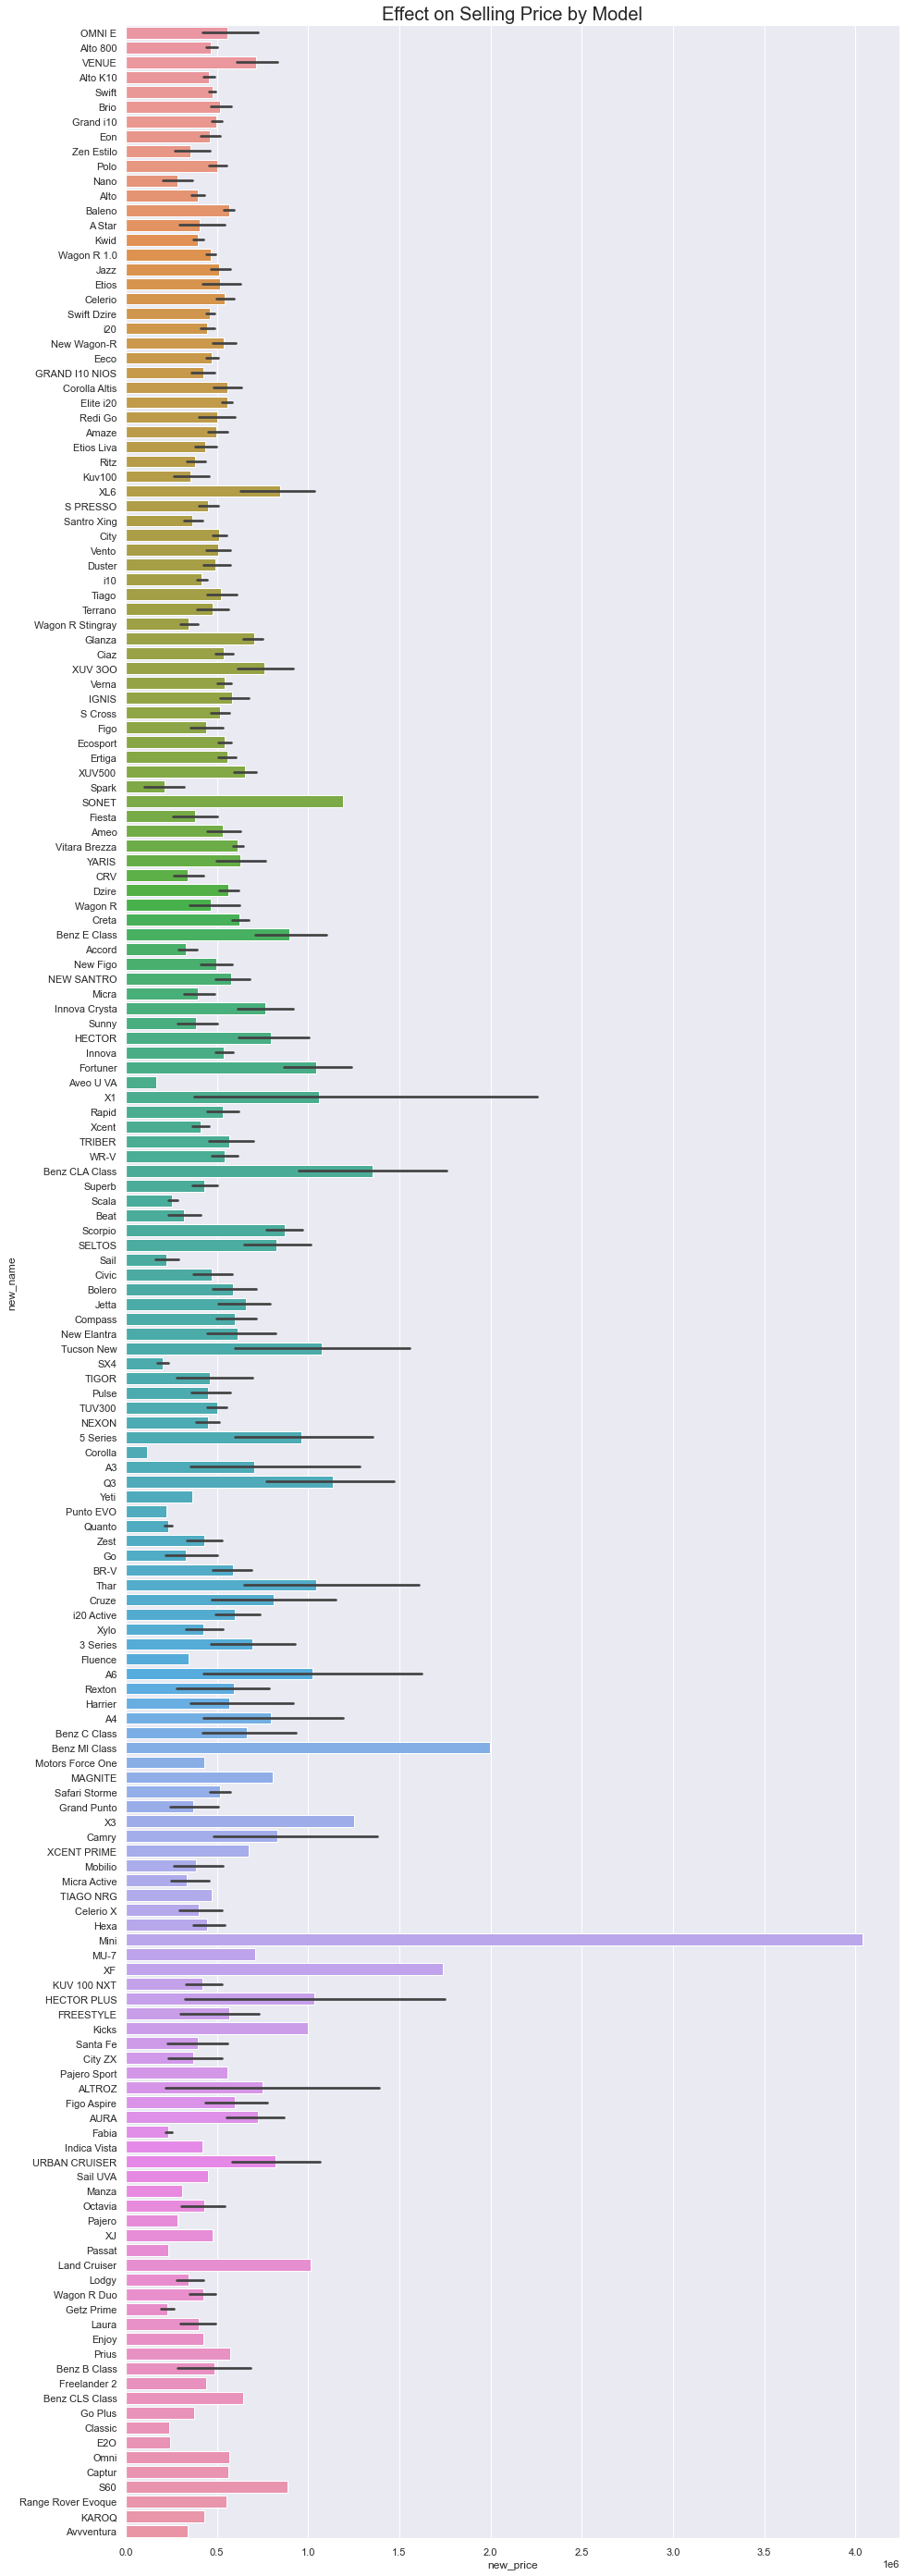

In [48]:
plt.figure(figsize = (15,50))
sns.barplot(data = df, x ='new_price', y = 'new_name')
plt.title("Effect on Selling Price by Model", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Ownership')

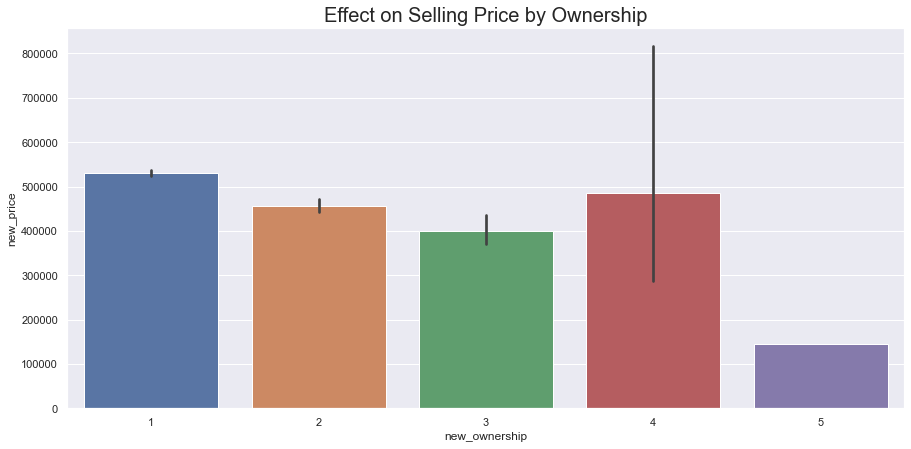

In [49]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='new_ownership', y = 'new_price')
plt.title("Effect on Selling Price by Ownership", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Year of Purchase')

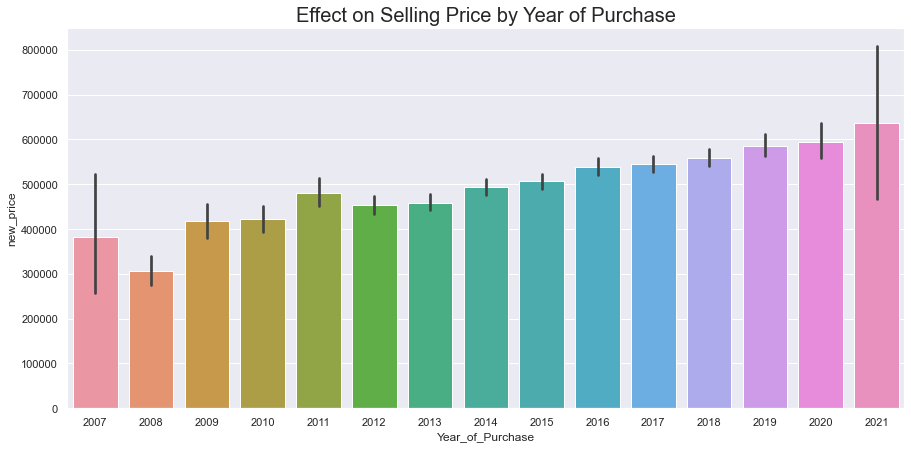

In [50]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='Year_of_Purchase', y = 'new_price')
plt.title("Effect on Selling Price by Year of Purchase", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Car Age')

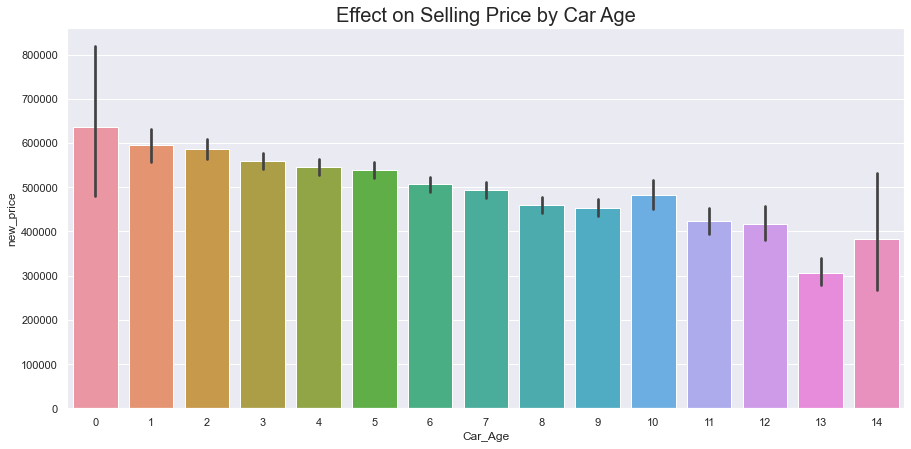

In [51]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='Car_Age', y = 'new_price')
plt.title("Effect on Selling Price by Car Age", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Fuel Type')

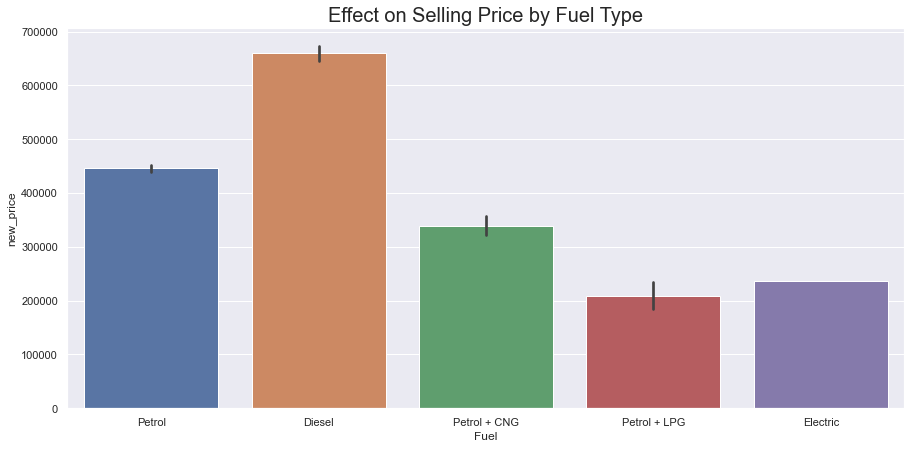

In [52]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='Fuel', y = 'new_price')
plt.title("Effect on Selling Price by Fuel Type", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Transmission Type')

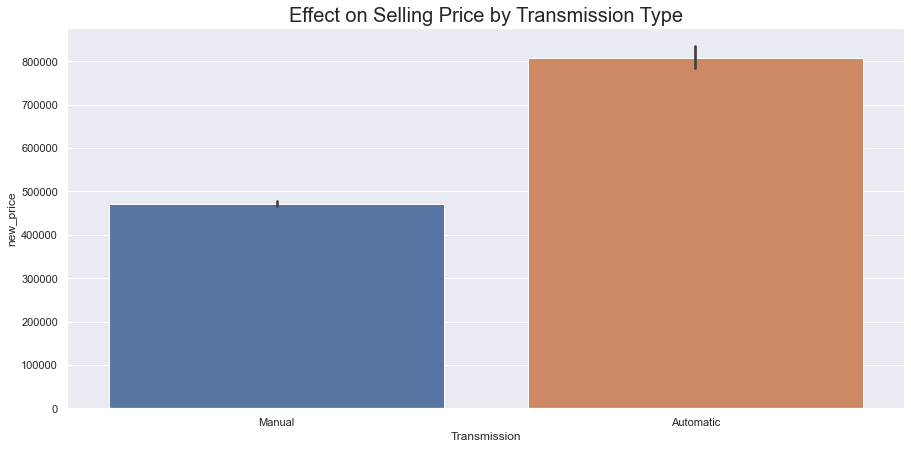

In [53]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='Transmission', y = 'new_price')
plt.title("Effect on Selling Price by Transmission Type", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by State')

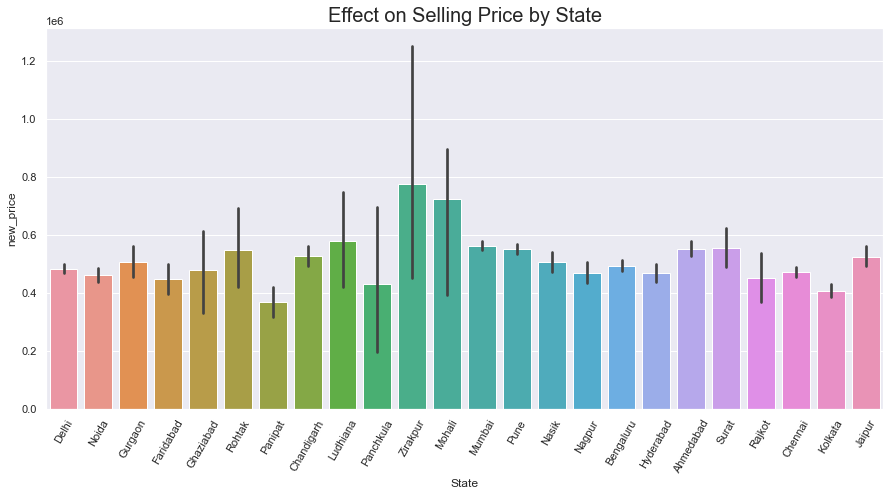

In [54]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='State', y = 'new_price')
plt.xticks(rotation = 60)
plt.title("Effect on Selling Price by State", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Kilometers Driven')

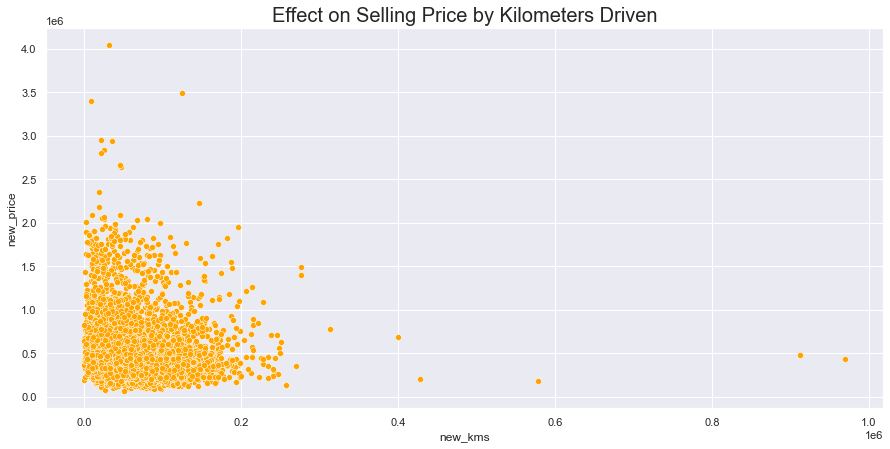

In [55]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = 'new_kms', y ='new_price', color = 'orange')
plt.title("Effect on Selling Price by Kilometers Driven", fontsize = 20)

Text(0.5, 1.0, 'Effect on Selling Price by Monthly EMI')

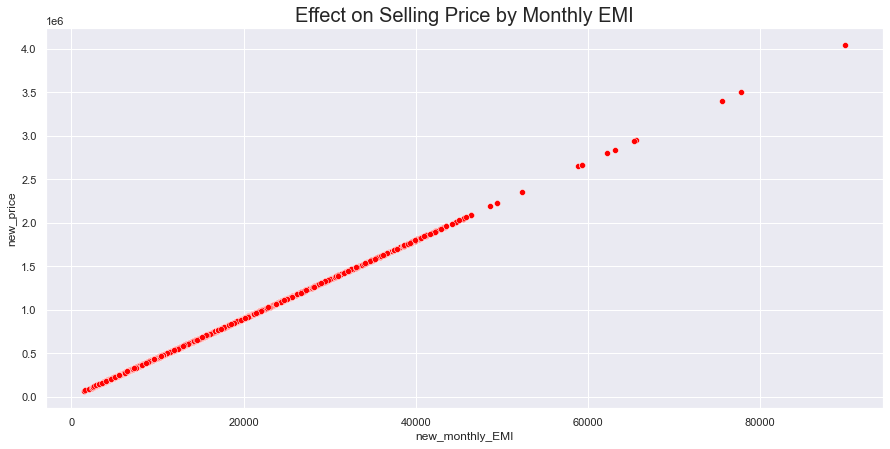

In [56]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = 'new_monthly_EMI', y ='new_price', color = 'red')
plt.title("Effect on Selling Price by Monthly EMI", fontsize = 20)

- Car from "Jaguar" costs the highest whereas cars from "Chevrolet" costs less.

- Cars with Diesel as Fueltype have higher selling price followed by petrol. However cars with Petrol+LPG have lowest selling price.

- Mini Cooper is the most expensive car in the lot.

- Car value decreases as the number of owners increases.

- Automatic Transmission Cars costs more than the Manual transmission cars. 

- As the age of car increases it's selling price decreases. Older the car lower the value.

- Cars from Zirakpur costs highest and cars from panipat costs lowest. 

- Price of a car is positively correlated with the Kilometers driven. 

### Multivariate Analysis

In [57]:
df.corr()

Year_of_Purchase  new_price   new_kms  new_monthly_EMI  \
Year_of_Purchase          1.000000   0.163460 -0.146783         0.163460   
new_price                 0.163460   1.000000 -0.095398         1.000000   
new_kms                  -0.146783  -0.095398  1.000000        -0.095399   
new_monthly_EMI           0.163460   1.000000 -0.095399         1.000000   
Car_Age                  -1.000000  -0.163460  0.146783        -0.163460   

                   Car_Age  
Year_of_Purchase -1.000000  
new_price        -0.163460  
new_kms           0.146783  
new_monthly_EMI  -0.163460  
Car_Age           1.000000

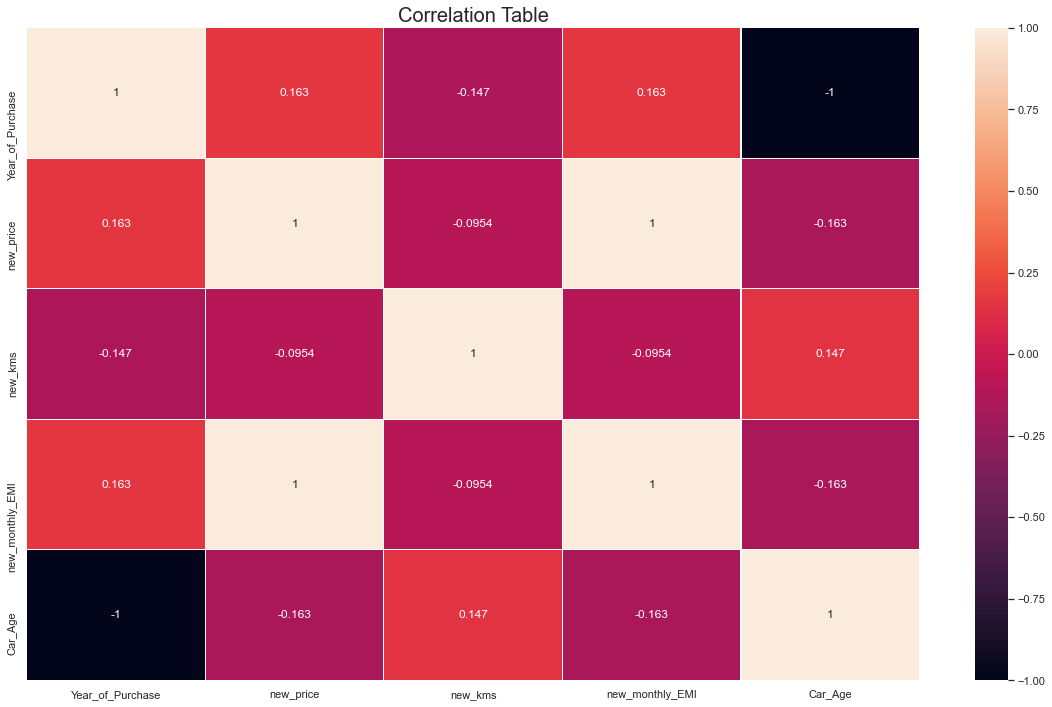

In [58]:
#Visualising correlation table
plt.figure(figsize = [20,12])
sns.heatmap(df.corr(), annot = True,linewidths=0.1,fmt = '.3g' )
plt.title("Correlation Table", fontsize = 20)
plt.show()

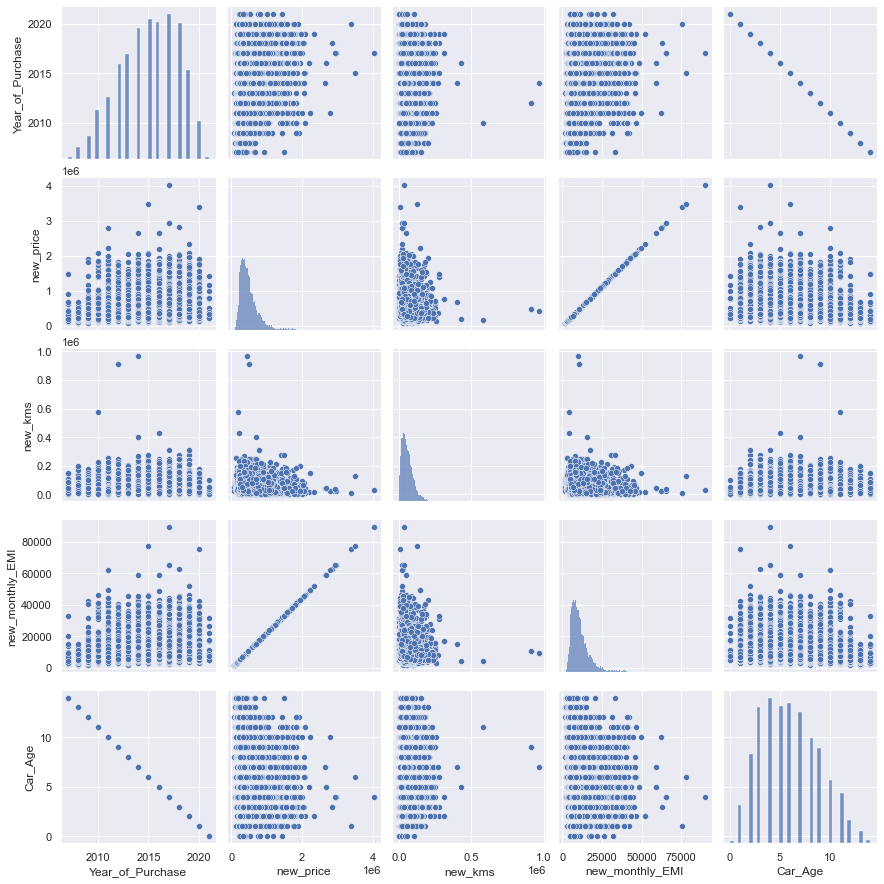

In [59]:
sns.pairplot(df)

- Price and Montly_EMI are positively correlated.
- Year of Purchase and Car Age is negatively Correlated.

### Cleaning Dataset

In [60]:
df.skew()

Year_of_Purchase   -0.325553
new_price           2.427691
new_kms             3.959195
new_monthly_EMI     2.427692
new_ownership       1.973647
Car_Age             0.325553
dtype: float64

<AxesSubplot:xlabel='new_price'>

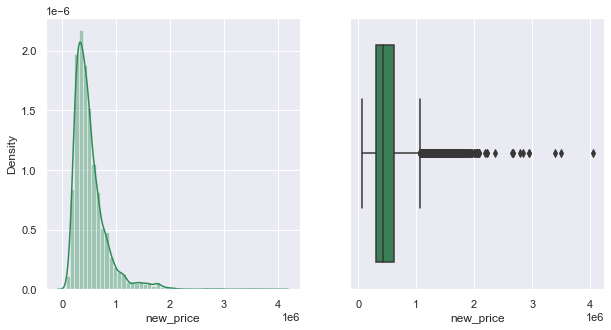

In [61]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['new_price'],color ='seagreen',ax = ax[0])
sns.boxplot(df['new_price'],color ='seagreen', ax = ax[1])

#we've rightly skewed data

In [62]:
df['new_price'] = np.log(df['new_price'])

<AxesSubplot:xlabel='new_price'>

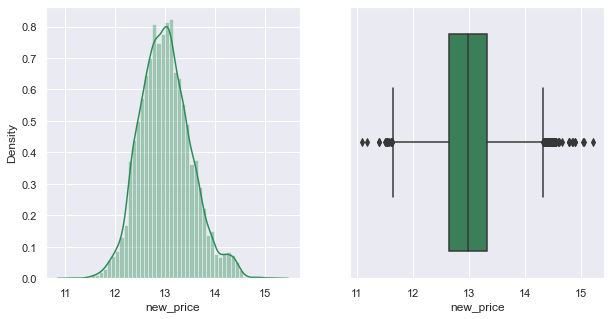

In [63]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['new_price'],color ='seagreen',ax = ax[0])
sns.boxplot(df['new_price'],color ='seagreen', ax = ax[1])

#we've rightly skewed data

<AxesSubplot:xlabel='new_kms'>

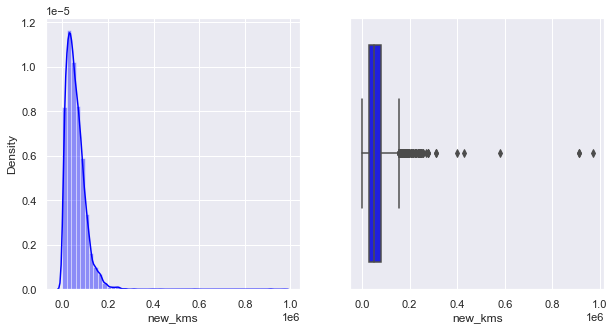

In [64]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['new_kms'],color ='blue',ax = ax[0])
sns.boxplot(df['new_kms'],color ='blue', ax = ax[1])

#we've rightly skewed data

In [65]:
df['new_kms'] = np.sqrt(df['new_kms'])

<AxesSubplot:xlabel='new_kms'>

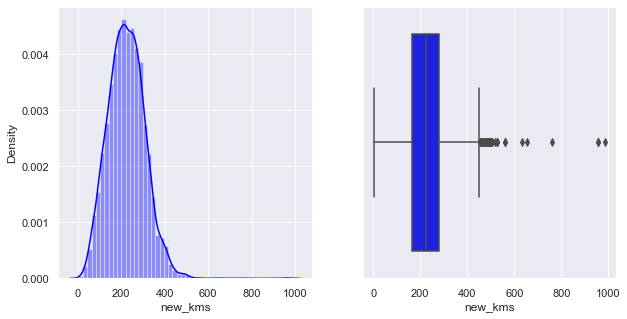

In [66]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['new_kms'],color ='blue',ax = ax[0])
sns.boxplot(df['new_kms'],color ='blue', ax = ax[1])

#we've rightly skewed data

<AxesSubplot:xlabel='new_monthly_EMI'>

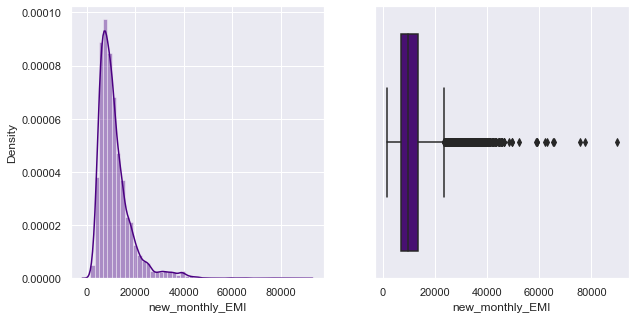

In [67]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['new_monthly_EMI'],color ='indigo',ax = ax[0])
sns.boxplot(df['new_monthly_EMI'],color ='indigo', ax = ax[1])

#we've rightly skewed data

In [68]:
df['new_monthly_EMI'] = np.log(df['new_monthly_EMI'])

<AxesSubplot:xlabel='new_monthly_EMI'>

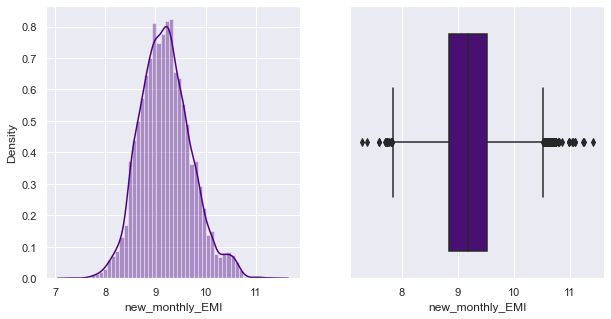

In [69]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['new_monthly_EMI'],color ='indigo',ax = ax[0])
sns.boxplot(df['new_monthly_EMI'],color ='indigo', ax = ax[1])

#we've rightly skewed data

### Encoding Our Dataset

In [70]:
enc = LabelEncoder()

In [71]:
df.drop(columns = ['URL','new_engine','Downpayment'], axis = 1, inplace = True)

In [72]:
df.head()

Brand Transmission    Fuel  Year_of_Purchase  State  new_name  new_price  \
0   Maruti       Manual  Petrol              2014  Delhi    OMNI E  12.155826   
1   Maruti       Manual  Petrol              2014  Delhi  Alto 800  12.589970   
2  Hyundai    Automatic  Petrol              2021  Delhi     VENUE  13.585719   
3   Maruti       Manual  Petrol              2013  Delhi  Alto K10  12.307270   
4   Maruti       Manual  Petrol              2015  Noida  Alto 800  12.473038   

      new_kms  new_monthly_EMI new_ownership  Car_Age  
0    4.795832         8.350194             1        7  
1  111.959814         8.784315             1        7  
2   50.882217         9.780076             1        0  
3  200.459472         8.501673             1        8  
4   96.005208         8.667336             1        6

In [73]:
df['Brand'] = enc.fit_transform(df['Brand'])
df['Transmission'] = enc.fit_transform(df['Transmission'])
df['Fuel'] = enc.fit_transform(df['Fuel'])
df['State'] = enc.fit_transform(df['State'])
df['new_name'] = enc.fit_transform(df['new_name'])

In [74]:
df.head()

Brand  Transmission  Fuel  Year_of_Purchase  State  new_name  new_price  \
0     16             1     2              2014      4       100  12.155826   
1     16             1     2              2014      4        10  12.589970   
2      8             0     2              2021      4       144  13.585719   
3     16             1     2              2013      4        11  12.307270   
4     16             1     2              2015     16        10  12.473038   

      new_kms  new_monthly_EMI new_ownership  Car_Age  
0    4.795832         8.350194             1        7  
1  111.959814         8.784315             1        7  
2   50.882217         9.780076             1        0  
3  200.459472         8.501673             1        8  
4   96.005208         8.667336             1        6

### Preparing Dataset for Modelling

In [75]:
#Splitting Dataset into Features and Target Variable

X = df.drop('new_price',axis =1)
y = df['new_price']

In [76]:
#Using Train_test_Split for splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

### Linear Regression

In [77]:
#Model Instantiating and Fitting

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  100.0 %
Linear Regression Model Confidence on testing set :  100.0 %


In [79]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [80]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  3.805866169396701 

Features and their corresponding weights:


features  coefficients
0             Brand -3.058231e-08
1      Transmission -1.236617e-07
2              Fuel -1.500807e-07
3  Year_of_Purchase -1.048376e-07
4             State -1.232258e-07
5          new_name -1.513932e-08
6           new_kms  4.584379e-09
7   new_monthly_EMI  1.000001e+00
8     new_ownership -1.434666e-06
9           Car_Age  1.048376e-07

In [81]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.9999999945833078
Mean Absolute Error for our Linear Regression Model: 2.9039610219085915e-05
Mean Squared Error for our Linear Regression Model: 1.4491249104116253e-09
Root Mean Squared Error for our Linear Regression Model: 3.8067373305911526e-05


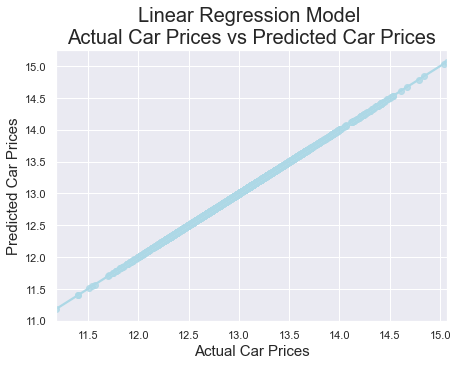

In [82]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'lightblue')
plt.xlabel('Actual Car Prices', fontsize =15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('Linear Regression Model \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Lasso Regularization

In [83]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

6.155141403094636e-06

In [84]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=6.155141403094636e-06)

In [85]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  100.0 %


In [86]:
#Applying Evaluation metrics to our Regression model
test = lasso_reg.predict(X_test)
print('R squared for our Lasso Regularization Model:', r2_score(y_test,test))
print('Mean Absolute Error for our Lasso Regularization Model:',mean_absolute_error(y_test,test))
print('Mean Squared Error for our Lasso Regularization Model:',mean_squared_error(y_test,test))
print('Root Mean Squared Error for our Lasso Regularization Model:',np.sqrt(mean_squared_error(y_test,test)))

R squared for our Lasso Regularization Model: 0.9999999918630157
Mean Absolute Error for our Lasso Regularization Model: 3.635566743791029e-05
Mean Squared Error for our Lasso Regularization Model: 2.1768832958218423e-09
Root Mean Squared Error for our Lasso Regularization Model: 4.665708194713684e-05


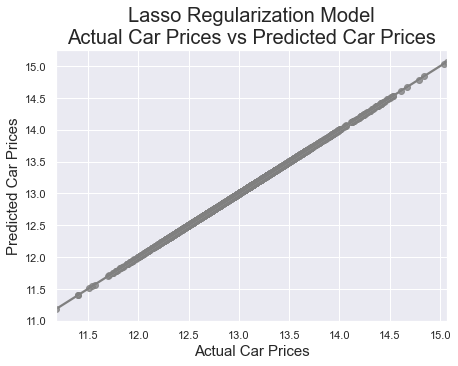

In [87]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=test,data=X, color = 'grey')
plt.xlabel('Actual Car Prices', fontsize =15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('Lasso Regularization Model\nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Decision Tree Regressor

In [88]:
#Model instantiating and fitting

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [89]:
#Applying Evaluation metrics to our Regression model
prd = dt.predict(X_test)

print('R squared for our Decision Tree Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our  Decision Tree Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our  Decision Tree Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our  Decision Tree Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Decision Tree Regression Model: 0.9996103046279912
Mean Absolute Error for our  Decision Tree Regression Model: 0.0009629242095726737
Mean Squared Error for our  Decision Tree Regression Model: 0.0001042550055169179
Root Mean Squared Error for our  Decision Tree Regression Model: 0.010210534046606863


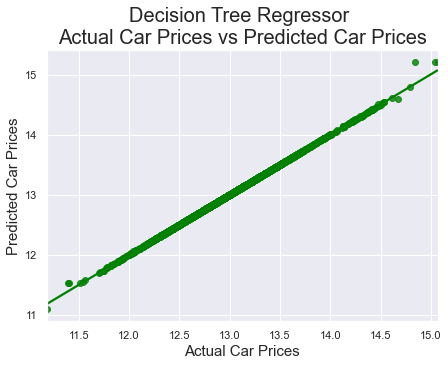

In [90]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=prd,data=X, color = 'green')
plt.xlabel('Actual Car Prices', fontsize = 15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('Decision Tree Regressor \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Random Forest Regressor

In [91]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [92]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.9998352526137184
Mean Absolute Error for our Random Forest Regressor Model: 0.0006959825457108985
Mean Squared Error for our Random Forest Regressor Model: 4.407478481754109e-05
Root Mean Squared Error for our Random Forest Regressor Model: 0.006638884305178175


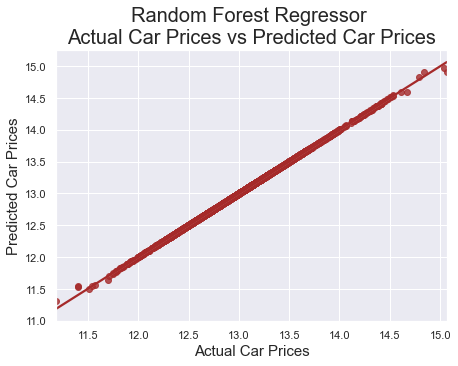

In [93]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=pred,data=X, color = 'brown')
plt.xlabel('Actual Car Prices', fontsize = 15 )
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('Random Forest Regressor \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### K - Nearest Neighbor

In [94]:
#Model fitting and Instantiating

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [95]:
print("Model Confidence on training Dataset: ",knn.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",knn.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  37.68930848568295 %
Model Confidence on test Dataset: 5.187575681985845 %


In [96]:
knnpred  = knn.predict(X_test)
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.051875756819858454
Mean Absolute Error for our KNN Regression Model: 0.3877894901406922
Mean Squared Error for our KNN Regression Model: 0.25365119861166524
Root Mean Squared Error for our KNN Regression Model: 0.5036379638308308


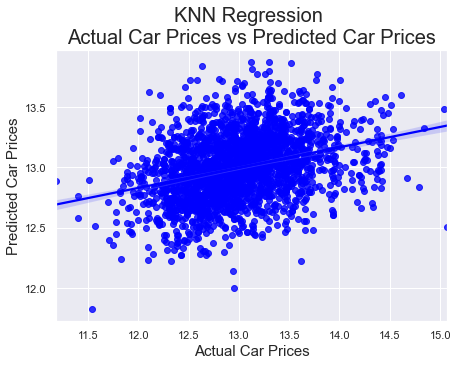

In [97]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'blue')
plt.xlabel('Actual Car Prices',fontsize = 15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('KNN Regression \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Gradient Boosting Regressor

In [98]:
#Model Instantiating and fitting

gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [99]:
grpred = gradient.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,grpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,grpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,grpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,grpred)))

R2 Score for Gradient Boostin Regresser Model: 0.999794033352877
Mean Absolute Error for our Gradient Boostin Regresser Model: 0.004146869429276455
Mean Squared Error for our Gradient Boostin Regresser Model: 5.5102152795442316e-05
Root Mean Squared Error for our Gradient Boostin Regresser Model: 0.0074230824322138785


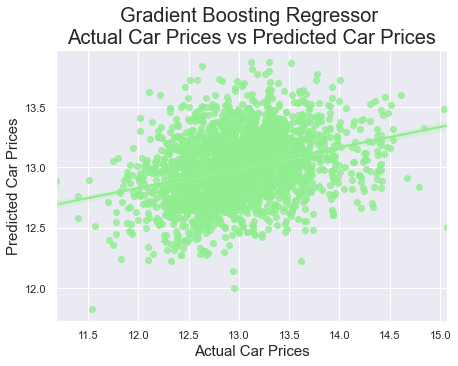

In [100]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'lightgreen')
plt.xlabel('Actual Car Prices', fontsize = 15)
plt.ylabel('Predicted Car Prices',fontsize =15)
plt.title('Gradient Boosting Regressor \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Bagging Regressor

In [101]:
#Model Instantiating and fitting

bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

BaggingRegressor()

In [102]:
bgpred = bagging.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Bagging Regressor Model:', r2_score(y_test,bgpred))
print('Mean Absolute Error for our Bagging Regressor Model:',mean_absolute_error(y_test,bgpred))
print('Mean Squared Error for our Bagging Regressor Model:',mean_squared_error(y_test,bgpred))
print('Root Mean Squared Error for our Bagging Regressor Model:',np.sqrt(mean_squared_error(y_test,bgpred)))

R2 Score for Bagging Regressor Model: 0.999813687725907
Mean Absolute Error for our Bagging Regressor Model: 0.0008107249739075629
Mean Squared Error for our Bagging Regressor Model: 4.9844028332478195e-05
Root Mean Squared Error for our Bagging Regressor Model: 0.007060030335096174


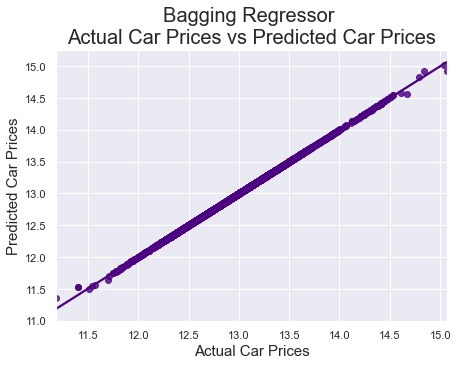

In [103]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=bgpred,data=X, color = 'indigo')
plt.xlabel('Actual Car Prices',fontsize =15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('Bagging Regressor \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Adaboost Regressor

In [104]:
#Model Instantiating and fitting

ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [105]:
adapred = ada.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Adaptive Boostin Regressor Model:', r2_score(y_test,adapred))
print('Mean Absolute Error for our Adaptive Boostin Regressor Model:',mean_absolute_error(y_test,adapred))
print('Mean Squared Error for our Adaptive Boostin Regressor Model:',mean_squared_error(y_test,adapred))
print('Root Mean Squared Error for our Adaptive Boostin Regressor Model:',np.sqrt(mean_squared_error(y_test,adapred)))

R2 Score for Adaptive Boostin Regressor Model: 0.9915868796123546
Mean Absolute Error for our Adaptive Boostin Regressor Model: 0.0375940446206738
Mean Squared Error for our Adaptive Boostin Regressor Model: 0.002250757836581371
Root Mean Squared Error for our Adaptive Boostin Regressor Model: 0.0474421525289628


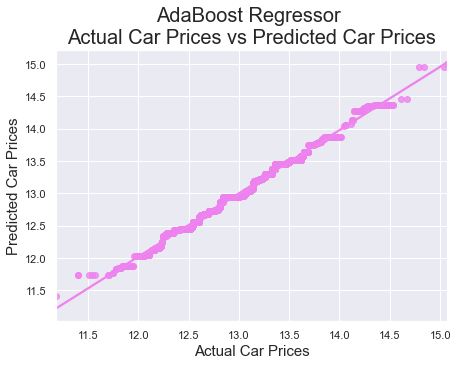

In [106]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=adapred,data=X, color = 'violet')
plt.xlabel('Actual Car Prices',fontsize =15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('AdaBoost Regressor \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Ridge Regularization

In [107]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.2,0.001),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199]),
        normalize=True)

In [108]:
ridgecv.alpha_

0.001

In [109]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [110]:
ridge_model.score(X_test,y_test)

0.9999999945813921

In [111]:
ridgepred = ridge_model.predict(X_test)
#Applying Evaluation metrics to our Tuned Ridge Regression model
print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.9999999945813921
Mean Absolute Error for our Tuned Ridge Regression Model: 2.9035769617695107e-05
Mean Squared Error for our Tuned Ridge Regression Model: 1.4496374191195356e-09
Root Mean Squared Error for our Ridge Linear Regression Model: 3.8074104311454726e-05


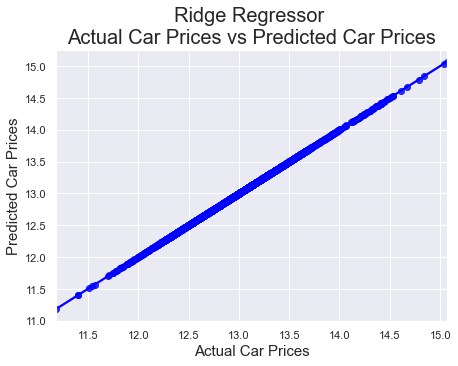

In [112]:
#Plotting Regression Line
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=ridgepred,data=df, color = 'blue')
plt.xlabel('Actual Car Prices',fontsize =15)
plt.ylabel('Predicted Car Prices', fontsize = 15)
plt.title('Ridge Regressor \nActual Car Prices vs Predicted Car Prices',fontsize = 20)
plt.show()

### Conclusion :
- Among all other models Random Forest Regressor Model seems to giving us high scores among all evaluation metrics : 
    - R_square Score: 0.88
    - MAE : 0.718
    - MSE : 1.077
    - RMSE : 1.037

### Hyperparameter Tuning of Two best models

In [113]:
param_grid = {'fit_intercept' : [True,False],
             'normalize' : [True, False],
             'precompute' : ['auto',True,False],
             'selection' : ['cyclic','random'],
             'max_iter' : [1000,1500,2000,2500]}

rand_search = RandomizedSearchCV(estimator=LassoCV(), 
                            param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'selection': 'cyclic', 'precompute': 'auto', 'normalize': True, 'max_iter': 1000, 'fit_intercept': True}
0.9999989945422835


In [114]:
model = LassoCV( normalize = True, selection = 'cyclic', precompute = 'auto', max_iter = 1000, fit_intercept = True)
model.fit(X_train,y_train)

LassoCV(normalize=True)

In [115]:
pred = model.predict(X_test)

In [116]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Tuned Lasso Regression Model: 0.9999989926162544
Mean Absolute Error for our Tuned Lasso Regression Model: 0.000407442242485941
Mean Squared Error for our Tuned Lasso Regression Model: 2.69504863308335e-07
Root Mean Squared Error for our Lasso Linear Regression Model: 0.0005191385781352942


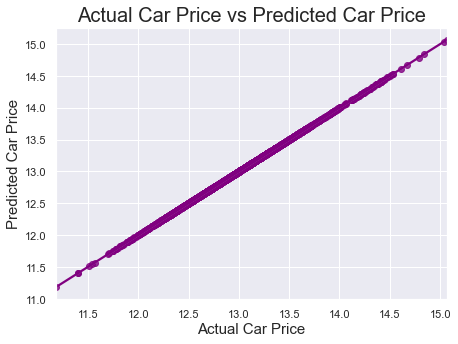

In [117]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=pred,data=X, color = 'purple')
plt.xlabel('Actual Car Price', fontsize = 15)
plt.ylabel('Predicted Car Price', fontsize = 15)
plt.title('Actual Car Price vs Predicted Car Price', fontsize = 20)
plt.show()

### Saving our Final Model

In [118]:
joblib.dump(model,"CarsPricePredictionAnalysis.pkl")

['CarsPricePredictionAnalysis.pkl']

### Loading Our Final Model

In [119]:
Model = joblib.load("CarsPricePredictionAnalysis.pkl")

In [120]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = Model.predict(X_test)
prediction = pd.DataFrame(prediction)

In [121]:
#Creating a dataset of Actual vs Predicted Datapoints
Car_Prices = pd.DataFrame({})
Car_Prices['Actual_Car_Prices'] = y[:2270]
Car_Prices['Predicted_Car_Prices'] = prediction
Car_Prices

Actual_Car_Prices  Predicted_Car_Prices
0             12.155826             14.397629
1             12.589970             13.537359
2             13.585719             13.645042
3             12.307270             13.676631
4             12.473038             14.238049
5             12.592691             12.501509
6             12.538246             13.166762
7             12.839998             13.395832
8             12.773087             12.942853
9             12.310428             13.015696
10            12.630029             13.378191
11            12.086157             12.481583
12            12.819903             13.689847
13            12.204066             13.521946
14            12.896464             12.774421
15            12.785768             12.427437
16            13.027831             12.945644
17            12.344960             13.071848
18            13.262124             13.252096
19            12.761678             14.613403
20            12.638501             13.789397
21            12.185865             13.015396
22            12.565141             13.223615
23            12.540038             12.562791
24            12.688804             13.147682
25            12.575216             13.987318
26            13.145687             12.812981
27            12.070820             12.360222
28            12.380022             12.979887
29            12.944669             13.579211
30            12.792467             12.945644
31            12.684475             13.320084
32            12.771099             12.392252
33            12.239019             12.351323
34            12.857874             12.864045
35            12.495004             14.786412
36            12.450191             14.172036
37            13.184961             12.972923
38            12.680439             12.994794
39            12.096252             12.335655
40            11.985420             13.133395
41            12.779870             12.896093
42            13.039632             12.577774
43            12.929262             12.903611
44            12.520880             13.457544
45            12.501347             13.355694
46            12.821796             12.822241
47            12.247210             13.928370
48            12.721286             13.141622
49            12.697407             12.897556
50            12.899217             13.285906
51            12.710777             13.345186
52            12.613200             12.997748
53            12.823955             12.926380
54            13.125357             13.337178
55            12.224889             13.194466
56            12.366485             12.860083
57            12.720389             12.880198
58            13.093138             12.714111
59            12.657782             11.899317
60            12.528153             13.842498
61            12.586217             12.318734
62            13.154635             13.003834
63            12.906692             13.353914
64            12.731390             13.297504
65            12.756501             13.151789
66            12.104034             13.122230
67            12.744024             13.906735
68            11.863582             13.994659
69            12.838671             13.119261
70            12.620164             12.346453
71            12.338411             13.593660
72            13.393916             12.595888
73            13.278168             13.004441
74            12.863849             13.565358
75            12.839998             12.756448
76            12.859696             13.266893
77            12.545750             12.958742
78            13.389025             12.400610
79            12.472655             12.321341
80            12.662228             12.506679
81            13.186838             12.629101
82            12.406557             13.516029
83            12.890681             13.922743
84            12.788844             12.832737
85            12.768254             13.002215
86  

In [122]:
#Converting the saved file into .csv format
Car_Prices.to_csv('Results.csv',index = True)

In [123]:
Model =  ['Linear Regression','Lasso Regularization','Decision Tree Regressor','Random Forest Regressor','Ridge Regularization', 'K-Nearest Neighbors', 'Gradient Boost Regressor','Adaptive Boosting Regressor','Bagging Regressor']

In [124]:
## Model Evaluation Metrics with Feature Selection

models = pd.DataFrame( index = Model)

models['r2 Score (%)'] = [99.99,99.99,99.99,99.96, 99.99,7.08, 99.96, 98.88,99.99]
models['Mean Absolute Error(e-05)'] = [2.834,4.830,0.0007,0.0006,2.8344,0.3788, 0.003, 0.041, 0.0007]
models['Mean Squared Error (e-09)'] = [1.337,3.566, 8.076,8.888,1.337, 0.243, 9.009, 0.0029, 8.758]
models['Root Mean Squared Error(e-05)'] = [3.6571,5.9721,0.0089,0.0094,3.6578,0.4932, 0.0094, 0.0540, 0.0093]
models

r2 Score (%)  Mean Absolute Error(e-05)  \
Linear Regression                   99.99                     2.8340   
Lasso Regularization                99.99                     4.8300   
Decision Tree Regressor             99.99                     0.0007   
Random Forest Regressor             99.96                     0.0006   
Ridge Regularization                99.99                     2.8344   
K-Nearest Neighbors                  7.08                     0.3788   
Gradient Boost Regressor            99.96                     0.0030   
Adaptive Boosting Regressor         98.88                     0.0410   
Bagging Regressor                   99.99                     0.0007   

                             Mean Squared Error (e-09)  \
Linear Regression                               1.3370   
Lasso Regularization                            3.5660   
Decision Tree Regressor                         8.0760   
Random Forest Regressor                         8.8880   
Ridge Regularization                            1.3370   
K-Nearest Neighbors                             0.2430   
Gradient Boost Regressor                        9.0090   
Adaptive Boosting Regressor                     0.0029   
Bagging Regressor                               8.7580   

                             Root Mean Squared Error(e-05)  
Linear Regression                                   3.6571  
Lasso Regularization                                5.9721  
Decision Tree Regressor                             0.0089  
Random Forest Regressor                             0.0094  
Ridge Regularization                                3.6578  
K-Nearest Neighbors                                 0.4932  
Gradient Boost Regressor                            0.0094  
Adaptive Boosting Regressor                         0.0540  
Bagging Regressor                                   0.0093